<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-1" data-toc-modified-id="Part-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part 1</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Aim" data-toc-modified-id="Aim-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Aim</a></span></li><li><span><a href="#Sexual-orientation" data-toc-modified-id="Sexual-orientation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Sexual orientation</a></span></li><li><span><a href="#Main-language" data-toc-modified-id="Main-language-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Main language</a></span></li></ul></li><li><span><a href="#Part-2" data-toc-modified-id="Part-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part 2</a></span><ul class="toc-item"><li><span><a href="#Region-and-urban-rural-classification" data-toc-modified-id="Region-and-urban-rural-classification-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Region and urban-rural classification</a></span></li></ul></li><li><span><a href="#Outputs" data-toc-modified-id="Outputs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Outputs</a></span></li><li><span><a href="#Religion" data-toc-modified-id="Religion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Religion</a></span></li><li><span><a href="#Total-numbers---table" data-toc-modified-id="Total-numbers---table-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Total numbers - table</a></span><ul class="toc-item"><li><span><a href="#Shannon-index" data-toc-modified-id="Shannon-index-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Shannon index</a></span></li><li><span><a href="#%-Non-response-per-religious-category" data-toc-modified-id="%-Non-response-per-religious-category-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>% Non-response per religious category</a></span></li><li><span><a href="#Total-number-of-atheists-/-total-number-of-respondents" data-toc-modified-id="Total-number-of-atheists-/-total-number-of-respondents-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Total number of atheists / total number of respondents</a></span></li><li><span><a href="#NR-rate-for-Atheists" data-toc-modified-id="NR-rate-for-Atheists-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>NR rate for Atheists</a></span></li><li><span><a href="#Total-number-of-Christians-/-total-number-of-respondents" data-toc-modified-id="Total-number-of-Christians-/-total-number-of-respondents-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Total number of Christians / total number of respondents</a></span></li><li><span><a href="#NR-rate-for-Atheists" data-toc-modified-id="NR-rate-for-Atheists-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>NR rate for Atheists</a></span></li></ul></li><li><span><a href="#Outputs" data-toc-modified-id="Outputs-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Outputs</a></span></li></ul></div>

# Part 1

## Import libraries

In [20]:
# used to manipulate dataframes
import pandas as pd

# used to create visualisations
import seaborn as sns
import matplotlib.pylab as plt

# used to create interactive visualisations
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# used to apply scatterplot labels at selective distances 
from sklearn.neighbors import NearestNeighbors

# used to calculate correlation
from scipy.stats import pearsonr

## Aim

To eventually create some interactive scatterplots which explore the relationship between:

* relationship between non-response (for sexual orientation Q) and the % of Non-English speakers in our LA's
* relationship between religious group % and contribution to non-response rates in LAs

In this notebook, we'll just be focusing on the first bullet point. 

Let's get started.

## Sexual orientation

### Read-in sexual orientation data

First we will import the sexual orientation dataset which details SO responses by local authority.

We are importing cleaned data - column names have been shorted and underscored where necessary. 


In [2]:
# Let's read in SO data

df = pd.read_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/so_renamed.csv')

### Overview

In [3]:
# Let's check it out

df.head()

,LA_code,LA_name,SO_code,SO_categories,Observation
0,E06000001,Hartlepool,-8,Does not apply,0
1,E06000001,Hartlepool,1,Straight or Heterosexual,68070
2,E06000001,Hartlepool,2,Gay or Lesbian,1121
3,E06000001,Hartlepool,3,Bisexual,784
4,E06000001,Hartlepool,4,All other sexual orientations,157


In [4]:
# Some more info...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LA_code        1986 non-null   object
 1   LA_name        1986 non-null   object
 2   SO_code        1986 non-null   int64 
 3   SO_categories  1986 non-null   object
 4   Observation    1986 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 77.7+ KB


In [5]:
# Let's take a look at our SO codes

df.SO_code.unique()

array([-8,  1,  2,  3,  4,  5])

In [6]:
# Let's see what they refer to...

df.SO_categories.unique()

array(['Does not apply', 'Straight or Heterosexual', 'Gay or Lesbian',
       'Bisexual', 'All other sexual orientations', 'Not answered'],
      dtype=object)

In [7]:
# We are working with 331 local authorities

df.LA_name.nunique()

331

In [8]:
# You can see we have our counts for each category for a specific LA

df.head(10)

,LA_code,LA_name,SO_code,SO_categories,Observation
0,E06000001,Hartlepool,-8,Does not apply,0
1,E06000001,Hartlepool,1,Straight or Heterosexual,68070
2,E06000001,Hartlepool,2,Gay or Lesbian,1121
3,E06000001,Hartlepool,3,Bisexual,784
4,E06000001,Hartlepool,4,All other sexual orientations,157
5,E06000001,Hartlepool,5,Not answered,4554
6,E06000002,Middlesbrough,-8,Does not apply,0
7,E06000002,Middlesbrough,1,Straight or Heterosexual,102027
8,E06000002,Middlesbrough,2,Gay or Lesbian,1787
9,E06000002,Middlesbrough,3,Bisexual,1385


### Data pre-processing

Calculating SO response percentages.

In [9]:

# Let's calculate the df_category percentages for each local authority, then subset our df
# I've named this new column NR_rate

df['NR_rate'] = ''


for i in df.LA_code.unique():
    b = df[df.LA_code == i]
    percent = b['Observation'] / b['Observation'].sum() * 100
    df.loc[b.index, 'NR_rate'] = (percent).round(2)
    
# Now let's subset our df so that we're just left with our Non-response rates
df = df[df['SO_code'] == 5].drop(columns=['LA_code', 'SO_code', 'Observation', 'SO_categories'])

    
# Sort df alphabetically by LA_name and reset index 

df = df.sort_values(by = 'LA_name').reset_index(drop = True)

In [11]:
# Success!

df

,LA_name,NR_rate
0,Adur,6.47
1,Allerdale,6.18
2,Amber Valley,6.77
3,Arun,7.09
4,Ashfield,6.77
...,...,...
326,Wrexham,7.88
327,Wychavon,6.15
328,Wyre,6.1
329,Wyre Forest,6.91


## Main language

Okay, so we have our non-response rate for each LA, we also need the % of Non-English speakers.

Let's start by importing the main language dataset, which classifies residents by their main language.

### Read-in data

### Cleaning data and Pre-processing

This step requires us to read-in the main language dataset and then clean the columns and calculate our Non-English percentages.

Luckily for us however, we have already completed this step in the previous 'Main_Lang_NR_GI.ipynb' notebook. So we'll just read-in that data!

In [12]:
non_eng_sum = pd.read_csv('../Data/non_eng_sum.csv')

In [13]:
# Let's take a look..
# Nice, we have our Non-English percentages for each LA

non_eng_sum

,LA_name,Observation,Non_Eng_Percentages
0,Adur,1971,3.14
1,Allerdale,1073,1.15
2,Amber Valley,1850,1.51
3,Arun,9469,5.89
4,Ashfield,3944,3.22
...,...,...,...
326,Wrexham,6682,5.10
327,Wychavon,6065,4.71
328,Wyre,1376,1.26
329,Wyre Forest,2331,2.36


### Merge datasets

All that's left for us to do now is merge our non_eng_sum dataset with our non-english percentages, with our df dataframe which has our non-response rates for each LA.

In [14]:
# Merge non_eng_sum and df together

merged_df = non_eng_sum.merge(df, on = ['LA_name'])

In [15]:
merged_df.head()

,LA_name,Observation,Non_Eng_Percentages,NR_rate
0,Adur,1971,3.14,6.47
1,Allerdale,1073,1.15,6.18
2,Amber Valley,1850,1.51,6.77
3,Arun,9469,5.89,7.09
4,Ashfield,3944,3.22,6.77


### Data processing

Awesome. Now we can move on to our data processing, where we can extract some useful information and insights from our 2 variables. We're going to make a simple scatterplot showing the relationship between non-response rate and % of non-english speakers in our LAs.

#### Scatterplot visualisation

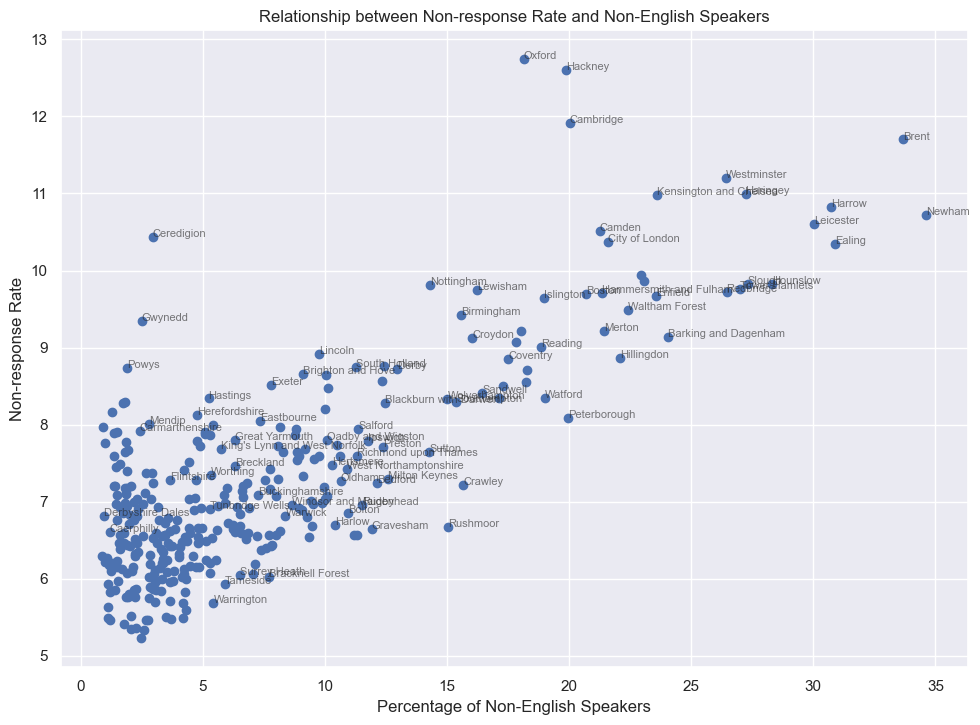

In [18]:
import matplotlib.pyplot as plt

# Set the size of the seaborn plot

sns.set(rc={'figure.figsize':(11.7,8.27)})

# Now we can visualise the relationship between GI NR and % of Non-Eng speakers

plt.scatter(merged_df['Non_Eng_Percentages'], merged_df['NR_rate'])

# We can use a bit of Machine Learning to selectively apply LA labels

# Find nearest neighbors
X = merged_df[['Non_Eng_Percentages', 'NR_rate']].values
nbrs = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nbrs.kneighbors(X)
min_distance = 0.3

for i, row in merged_df.iterrows():
    if distances[i][1] >= min_distance:
        plt.annotate(row['LA_name'], (row['Non_Eng_Percentages'], row['NR_rate']), fontsize=8, alpha=0.6)

plt.xlabel('Percentage of Non-English Speakers')
plt.ylabel('Non-response Rate')
plt.title('Relationship between Non-response Rate and Non-English Speakers')
plt.show()

### Correlation

In [21]:
# Calculate the Pearson correlation coefficient and the p-value

correlation, p_value = pearsonr(merged_df['Non_Eng_Percentages'], df['NR_rate'])

print("Correlation:", correlation)
print("P-value:", p_value)

Correlation: 0.783971686033584
P-value: 4.248327867805087e-70


# Part 2

Okay, so that's all well and good, but it'd be nice to explore this relationship further.

Therefore, I will:

* color-code each data point by region
* color-code each data point by urban-rural classification

## Region and urban-rural classification

We will classify each Local Authority by region and urban-rural classification, and add this info as an additional column to our merged_df. Again, we are lucky that we've already done this in the previous notebook mentioned above. So, we'll just read in the dataset!

### Read-in data

In [24]:
merged_2 = pd.read_csv('../Data/lang_rural_region_gi.csv')

In [25]:
# Great. What we'll do now is pinch the region and Urb_Rur columns
# We'll simply add them to our merged_df!

merged_2.head()

,LA_name,Observation,Non_Eng_Percentages,NR_rate,region,Urb_Rur
0,Adur,1971,3.14,4.68,South East,Predominantly Urban
1,Allerdale,1073,1.15,4.61,North West,Predominantly Rural
2,Amber Valley,1850,1.51,5.44,East Midlands,Predominantly Urban
3,Arun,9469,5.89,5.44,South East,Predominantly Urban
4,Ashfield,3944,3.22,5.64,East Midlands,Predominantly Urban


In [27]:
merged_df['region'] = merged_2['region'] 
merged_df['Urb_Rur'] = merged_2['Urb_Rur']

In [28]:
# Success.

merged_df.head()

,LA_name,Observation,Non_Eng_Percentages,NR_rate,region,Urb_Rur
0,Adur,1971,3.14,6.47,South East,Predominantly Urban
1,Allerdale,1073,1.15,6.18,North West,Predominantly Rural
2,Amber Valley,1850,1.51,6.77,East Midlands,Predominantly Urban
3,Arun,9469,5.89,7.09,South East,Predominantly Urban
4,Ashfield,3944,3.22,6.77,East Midlands,Predominantly Urban


### Data processing

Now that we have our finished dataset, we'll first make a scatterplot in seaborn, then will make a standalone interactive scatterplot using Bokeh.

#### Scatterplot - seaborn

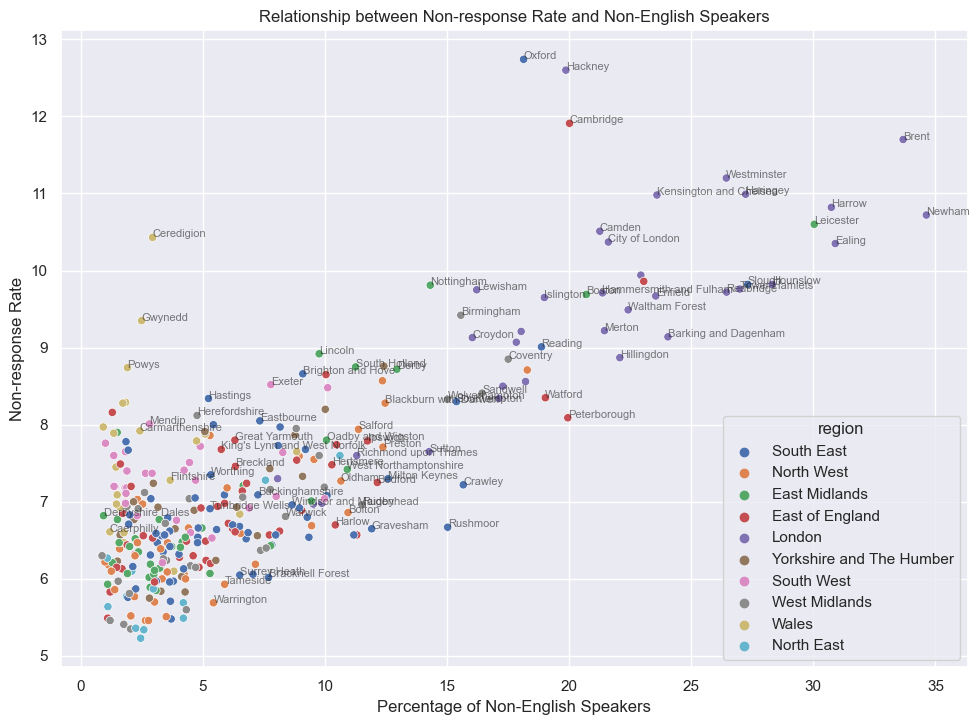

In [29]:
import seaborn as sns

# Set the size of the seaborn plot

sns.set(rc={'figure.figsize':(11.7,8.27)})

# Now we can visualise the relationship between GI NR and % of Non-Eng speakers
# Setting our hue to region, colours each dp by its corresponding region

ax = sns.scatterplot(data=merged_df, x='Non_Eng_Percentages', y='NR_rate', hue='region')

# We can use a bit of Machine Learning to selectively apply LA labels

from sklearn.neighbors import NearestNeighbors

# Find nearest neighbors

X = merged_df[['Non_Eng_Percentages', 'NR_rate']].values
nbrs = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nbrs.kneighbors(X)
min_distance = 0.3

for i, row in merged_df.iterrows():
    if distances[i][1] >= min_distance:
        ax.annotate(row['LA_name'], (row['Non_Eng_Percentages'], row['NR_rate']), fontsize=8, alpha=0.6)

# Set x,y, and title labels

plt.xlabel('Percentage of Non-English Speakers')
plt.ylabel('Non-response Rate')
plt.title('Relationship between Non-response Rate and Non-English Speakers')

# Display output

plt.show()


#### Scatterplot - Bokeh

In [30]:
# Let's see if we can make a standalone Bokeh plot for some of this data

from bokeh.models.annotations import LabelSet
from bokeh.models import ColumnDataSource, Label, LabelSet
from bokeh.palettes import Category10
from bokeh.io import show
from bokeh.models import CheckboxGroup, CustomJS
from bokeh.layouts import column
from bokeh.models import Button
from bokeh.plotting import figure, curdoc

# Bokeh has a hover tool, allowing you to scroll over dps to reveal info
# To configure the tool, we must set our tooltips arguments...

# We simply define a list of tuples which refer to column values in our merged_df 

tool = [
    ("index", "$index"),
    ("(x,y)", "(@Non_Eng_Percentages, @NR_rate)"),
    ("name","@LA_name"),
]

# Create graph figure, set title and x and y labels

p1 = figure(title="Relationship between NR rate and Non-English Speakers", x_axis_label="Percentage of Non-English Speakers", y_axis_label= "Non-response rate", tooltips = tool)

# To colour each data point by region we first loop over each unique region and its colour
for region, color in zip(merged_df.region.unique(), Category10[10]):
#     Subset dataframe by region for each unique region
    b = merged_df[merged_df.region == region]
#     Each dp within that region is then plotted with its data and specific colour
    p1.circle(x = 'Non_Eng_Percentages', y = 'NR_rate', size = 10, alpha = 0.5, color = color, legend_label = region, muted_color = color, muted_alpha = 0.1, source = b)


# Set location of legend

p1.legend.location = "bottom_right"

# Make it so that when a specific legend is clicked, its dps are removed from plot
p1.legend.click_policy="hide"

# Set legend title 
p1.legend.title = "Regions"

# Display output
output_notebook()
show(p1)


Loading BokehJS ...

# Outputs

In [31]:
merged_df.to_csv('../Data/lang_rural_region_so.csv', index = False)

# Religion

In [ ]:
# Read-in dataset for religion + sexual orientation

rel = pd.read_excel('/Users/loucap/Documents/GitWork/InteractiveGender/Data/religion_so.xlsx')
rel.rename(columns={'Lower tier local authorities Code': 'LA_code', 'Lower tier local authorities': 'LA_name', 'Sexual orientation (6 categories) Code': 'SO_code', 'Sexual orientation (6 categories)': 'SO_categories', 'Religion (10 categories) Code': 'Religion_code', 'Religion (10 categories)': 'Religion_categories'}, inplace=True)
rel = rel[(rel.SO_code != -8) & (rel.Religion_code != -8) & (rel.Religion_code != 9)]

# Calculate the total number of survey respondents for each religion
total_by_religion = rel.groupby('Religion_categories')['Observation'].sum().reset_index()

# Calculate the percentage of respondents for each religion
total_respondents = rel['Observation'].sum()
total_by_religion['Percent_of_survey_respondents'] = ((total_by_religion['Observation'] / total_respondents) * 100).round(2)

# Calculate the total non-response for each religion
non_response_rel = rel[rel['SO_categories'] == 'Not answered']
non_response_by_religion = non_response_rel.groupby('Religion_categories')['Observation'].sum().reset_index()

# Merge the total_by_religion and non_response_by_religion DataFrames
# merged_rel = total_by_religion.merge(non_response_by_religion, on='Religion_categories', suffixes=('', '_non_response'))

total_by_religion.head(9)
# merged_rel.head()

In [ ]:
# Calculate the non-response rate for each religion
non_response_by_religion['Non_response_rate'] = ((non_response_by_religion['Observation'] / total_by_religion['Observation']) * 100).round(2)

total_non_response = non_response_by_religion['Observation'].sum()
non_response_by_religion['Contribution_to_overall_non_response_rate'] = ((non_response_by_religion['Observation'] / total_non_response) * 100).round(2)


In [ ]:
non_response_by_religion.head(9)

In [ ]:
rel1 = pd.read_excel('/Users/loucap/Documents/GitWork/InteractiveGender/Data/religion_so.xlsx')

In [ ]:
# These column names are too wordy, let's rename them.

rel1.rename(columns={'Lower tier local authorities Code': 'LA_code', 'Lower tier local authorities': 'LA_name', 'Sexual orientation (6 categories) Code': 'SO_code', 'Sexual orientation (6 categories)': 'SO_categories', 'Religion (10 categories) Code': 'Religion_code', 'Religion (10 categories)': 'Religion_categories'}, inplace=True)

In [ ]:
rel1.SO_categories.unique()

In [ ]:
rel1.SO_code.unique()

# Total numbers - table

In [ ]:
# Nice. Lets now subset it, as we're only interested in non-response
# Let's also get rid of our empty 'Does not apply' category
# For now let's ignore our 'Non-response' for our rel1igious category

non_resp = rel1[(rel1.SO_code == 5) & (rel1.SO_code != -8) & (rel1.Religion_code != -8) & (rel1.Religion_code != 9)]

# Let's have a look...

non_resp.head(10)

In [ ]:
# Created an empty column to hold percentages of religions within each LA

non_resp['Percentages'] = ''

for i in non_resp.LA_name.unique():
    
    b = non_resp[non_resp.LA_name == i]
    
    perc = b.Observation / b.Observation.sum() * 100
    
    non_resp.loc[b.index, 'Percentages'] = round(perc, 2)

In [ ]:
sorted_df = non_resp.sort_values(by = ["LA_name", "Percentages"], ascending = [True, False])

sorted_df

## Shannon index

In [ ]:
# Let's now calculate the proportions
# To get better precision and not lose valuable insights I opted to round to 4 decimal places
sorted_df['Proportions'] = (sorted_df['Percentages'].astype(float) / 100).round(4)

In [ ]:
sorted_df.head()

In [ ]:
sorted_df['Calc'] = np.where(sorted_df['Proportions'] > 0, - sorted_df['Proportions'] * np.log(sorted_df['Proportions']), 0)

In [ ]:
# Created an empty column titled Shannon_idx
sorted_df['Shannon_idx'] = ''

for i in sorted_df.LA_code.unique():
    
    b = sorted_df[sorted_df.LA_code == i]
    summed = sum(b.Calc)
    
    sorted_df.loc[b.index, 'Shannon_idx'] = summed

In [ ]:
sorted_df.head()

In [ ]:
unique_shannon_df = sorted_df[['LA_name', 'Shannon_idx']].drop_duplicates(subset=['LA_name'])
unique_shannon_df.sort_values(by = 'Shannon_idx', ascending = False).head()

In [ ]:
cmap = plt.get_cmap("viridis")
cmap

In [ ]:
normalized_shannon = (sorted_df['Shannon_idx'] - sorted_df['Shannon_idx'].min()) / (sorted_df['Shannon_idx'].max() - sorted_df['Shannon_idx'].min())
normalized_shannon

In [ ]:
from bokeh.models import LogColorMapper

color_map = LogColorMapper(palette="Viridis256", low=sorted_df.Shannon_idx.min(), high=sorted_df.Shannon_idx.max())

color_map

In [ ]:
# Create a mapping between LA_code and Shannon_idx
la_code_to_shannon_idx = sorted_df.set_index('LA_code')['Shannon_idx'].to_dict()

In [ ]:
merged_df

In [ ]:
merged_df['Shannon_idx'] = merged_df['LA_code'].map(la_code_to_shannon_idx)

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10
from bokeh.models import ColorBar, BasicTicker, PrintfTickFormatter

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
    ("Shannon_idx", "@Shannon_idx")
]


p2 = figure(title="Relationship between Non-response Rate and Non-English Speakers", x_axis_label="Non-response Rate", y_axis_label="Percentage of Non-English Speakers", tooltips = tool)
output_notebook()

p2.scatter("Percentage", "Non-response_rate", source = merged_df, fill_alpha = 0.5, size = 10,  color={'field': 'Shannon_idx', 'transform': color_map})

color_bar = ColorBar(color_mapper=color_map,
                     title='Shannon Index',
                     ticker=BasicTicker(desired_num_ticks=5),
                     formatter=PrintfTickFormatter(format='%.2f'))

# Add the color bar to the plot
p2.add_layout(color_bar, 'right')


show(p2)

## % Non-response per religious category

In [ ]:
# Get rid of categories which are N/A and have 0 counts
# Also got rid of 'Not answered' category for rel1igion...is this wise?
# Will artificially inflate numbers of other rel1igious groups?

rel1 = rel1[(rel1.SO_code != -8) & (rel1.Religion_code != -8) & (rel1.Religion_code != 9)]


In [ ]:
# Let's calc the % of each rel1igious group and their SO answers for each LA

rel1['Group_Percentages'] = ''

for i in rel1.LA_name.unique():
    
    b = rel1[rel1.LA_name == i]
    
    perc = b.Observation / b.Observation.sum() * 100
    
    rel1.loc[b.index, 'Group_Percentages'] = round(perc, 2)

In [ ]:
rel1.head()

In [ ]:
# Created a column which holds the total amount of people in each LA e.g. in Hartlepool there's 70898 people
# This will help me with next calculation

rel1['Total_LA_counts'] = ''

for i in rel1.LA_name.unique():
    
    b = rel1[rel1.LA_name == i]
    
    tot = b.Observation.sum()
    
    rel1.loc[b.index, 'Total_LA_counts'] = tot

In [ ]:
rel1.head()

### ATHEISTS

In [ ]:
# First, we subset our dataframe to only get data where rel1igion_category == No rel1igion

atheist = rel1[(rel1.Religion_categories == 'No religion')]
atheist.head(10)

In [ ]:
# So, whilst we have the % of atheists for each SO category for each individual LA...
# We now want to know the total % of atheists in each LA

atheist['No religion_%'] = ''

for i in atheist.LA_code.unique():
    
    v = atheist[atheist.LA_code == i]
    
    perc = v.Group_Percentages.sum()
    
    atheist.loc[v.index, 'No religion_%'] = perc

In [ ]:
# Now we have...
# e.g. Hartlepool, our total % of atheists is 38.76% and out of that number...
# our non-response rate for atheists in this LA is 1.61%

atheist.head()

## Total number of atheists / total number of respondents

In [ ]:
atheist.Observation.sum() / rel.Observation.sum() * 100

In [ ]:
rel.Observation.sum()

In [ ]:
# In terms of my scatterplot, I want to subset my dataframe again so that I'm only looking at non-response for GI

x = atheist[atheist.SO_categories == 'Not answered']

In [ ]:
x

## NR rate for Atheists

In [ ]:
 atheist.Observation.sum()

In [ ]:
x.Observation.sum()

In [ ]:
x.Observation.sum() / atheist.Observation.sum() * 100

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Atheists in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Atheists in given LA", tooltips = tool)
output_notebook()

p2.scatter("No religion_%", "Group_Percentages", source = x, fill_alpha = 0.5, size = 10)

show(p2)

In [ ]:
from scipy.stats import pearsonr


correlation, _ = pearsonr(x['No religion_%'], x.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

In [ ]:
from scipy.stats import spearmanr

correlation_coefficient, p_value = spearmanr(x['No religion_%'], x.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

### CHRISTIAN

In [ ]:
def subset_rel(religion):
    a = rel1[(rel1.Religion_categories == religion)]
    
    a[religion+'_%'] = ''

    for i in a.LA_code.unique():
    
        v = a[a.LA_code == i]
    
        perc = v.Group_Percentages.sum()
    
        a.loc[v.index, religion+'_%'] = perc
        
        x = a[a.SO_categories == 'Not answered']
        
    return a,x

In [ ]:
christian, b = subset_rel('Christian')

## Total number of Christians / total number of respondents

In [ ]:
christian.Observation.sum() / rel.Observation.sum() * 100

## NR rate for Atheists

In [ ]:
b.Observation.sum() 

In [ ]:
b.head()

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Christians in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Christians in given LA", tooltips = tool)
output_notebook()

p2.scatter("Christian_%", "Group_Percentages", source = b, fill_alpha = 0.5, size = 10)

show(p2)

In [ ]:
from scipy.stats import pearsonr


correlation, _ = pearsonr(b['Christian_%'], b.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

In [ ]:
from scipy.stats import spearmanr

correlation_coefficient, p_value = spearmanr(b['Christian_%'], b.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

### MUSLIMS

In [ ]:
muslim, c = subset_rel('Muslim')

In [ ]:
c.head()

In [ ]:
muslim.Observation.sum() / rel.Observation.sum() * 100

In [ ]:
c.Observation.sum()

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Muslims in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Muslims in given LA", tooltips = tool)
output_notebook()

p2.scatter("Muslim_%", "Group_Percentages", source = c, fill_alpha = 0.5, size = 10)

show(p2)

In [ ]:
correlation, _ = pearsonr(c['Muslim_%'], c.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

In [ ]:
correlation_coefficient, p_value = spearmanr(c['Muslim_%'], c.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

### OTHER RELIGION

In [ ]:
other = rel1[(rel1.Religion_categories == 'Other religion')]
other.head(10)

In [ ]:
other['Other_%'] = ''

for i in other.LA_code.unique():
    
    v = other[other.LA_code == i]
    
    perc = v.Group_Percentages.sum()
    
    other.loc[v.index, 'Other_%'] = perc

In [ ]:
d = other[other.SO_categories == 'Not answered']

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Other religions in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Other religions in given LA", tooltips = tool)
output_notebook()

p2.scatter("Other_%", "Group_Percentages", source = d, fill_alpha = 0.5, size = 10)

show(p2)


In [ ]:
correlation, _ = pearsonr(d['Other_%'], d.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

In [ ]:
correlation_coefficient, p_value = spearmanr(d['Other_%'], d.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

### BUDDHIST

In [ ]:
buddhist, e = subset_rel('Buddhist')

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Buddhists in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Buddhists in given LA", tooltips = tool)
output_notebook()

p2.scatter("Buddhist_%", "Group_Percentages", source = e, fill_alpha = 0.5, size = 10)

show(p2)


In [ ]:
correlation, _ = pearsonr(e['Buddhist_%'], e.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

In [ ]:
correlation_coefficient, p_value = spearmanr(e['Buddhist_%'], e.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

### JEWISH

In [ ]:
jewish, f = subset_rel('Jewish')

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Jewish people in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Jewish people in given LA", tooltips = tool)
output_notebook()

p2.scatter("Jewish_%", "Group_Percentages", source = f, fill_alpha = 0.5, size = 10)

show(p2)

In [ ]:
correlation, _ = pearsonr(f['Jewish_%'], f.Group_Percentages)

print(f"Pearson correlation coefficient: {correlation:.2f}")

In [ ]:
correlation_coefficient, p_value = spearmanr(f['Jewish_%'], f.Group_Percentages)

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

### HINDU

In [ ]:
hindu, g = subset_rel('Hindu')

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Hindus in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Hindus in given LA", tooltips = tool)
output_notebook()

p2.scatter("Hindu_%", "Group_Percentages", source = g, fill_alpha = 0.5, size = 10)

show(p2)

In [ ]:
correlation, _ = pearsonr(g["Hindu_%"], g["Group_Percentages"])

print(f"Pearson correlation coefficient: {correlation:.2f}")

In [ ]:
correlation_coefficient, p_value = spearmanr(g["Hindu_%"], g["Group_Percentages"])

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

### SIKH

In [ ]:
sikh, h = subset_rel('Sikh')

In [ ]:
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import figure, show
from bokeh.palettes import Category10

tool = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("name","@LA_name"),
]
# p1.legend.location = "bottom_right"
# p1.legend.click_policy="hide"
# p1.legend.title = "Regions"

# regions = df.region_x.unique()
# urban = df.Urb_Rur.unique()


p2 = figure(title="Relationship between % of Sikhs in given LA, and their Non-response rate", y_axis_label="Non-response Rate", x_axis_label="Percentage of Sikhs in given LA", tooltips = tool)
output_notebook()

p2.scatter("Sikh_%", "Group_Percentages", source = h, fill_alpha = 0.5, size = 10)

show(p2)

In [ ]:
correlation, _ = pearsonr(h["Sikh_%"], h["Group_Percentages"])

print(f"Pearson correlation coefficient: {correlation:.2f}")

In [ ]:
correlation_coefficient, p_value = spearmanr(h["Sikh_%"], h["Group_Percentages"])

print(f"Spearman's rank correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

In [ ]:
# List of DataFrames and their corresponding suffixes
dataframes = [(x, '_Atheist'), (b, '_Christian'), (c, '_Muslim'), (d, '_Other'), (e, '_Buddhist'), (f, '_Jewish'), (g, '_Hindu'), (h, '_Sikh')]

# Merge the DataFrames one by one
merged_df2 = dataframes[0][0]  # Initialize with the first DataFrame
for df, suffix in dataframes[1:]:
    merged_df2 = merged_df2.merge(df, on=['LA_code', 'LA_name', 'SO_code', 'SO_categories'], suffixes=('', suffix))
    merged_df2 = merged_df2.rename(columns={'Total_counts': f'Total_counts{suffix}', 'Total': f'Total{suffix}'})

In [ ]:
merged_df2 = merged_df2.rename(columns = {'Group_Percentages': 'Group_Percentages_No religion'})

In [ ]:
merged_df2.columns

In [ ]:
cols = ["No religion_%", "Christian_%", "Muslim_%", "Other_%", "Buddhist_%", "Jewish_%", "Hindu_%", "Sikh_%"
       ,"Group_Percentages_No religion", "Group_Percentages_Christian", "Group_Percentages_Muslim",
       "Group_Percentages_Other", "Group_Percentages_Buddhist", "Group_Percentages_Jewish", "Group_Percentages_Hindu",
       "Group_Percentages_Sikh"]

In [ ]:
# List of religions
religions = ["No religion", "Christian", "Muslim", "Other", "Buddhist", "Jewish", "Hindu", "Sikh"]

# Preparing the DataFrame for correlation
correlation_values = []

for religion in religions:
    non_response = pd.to_numeric(merged_df2[f"{religion}_%"], errors = 'coerce')
    percentage = pd.to_numeric(merged_df2[f"Group_Percentages_{religion}"], errors = 'coerce')
    correlation = non_response.corr(percentage)
    correlation_values.append(correlation)


    
# Create a DataFrame for the correlation values
corr_df = pd.DataFrame(correlation_values, index=religions, columns=["Correlation"])

# Display the DataFrame
print(corr_df)

# Display a heatmap of the DataFrame
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')

plt.show()

In [ ]:
import pandas as pd

religions = ["No religion", "Christian", "Muslim", "Other", "Buddhist", "Jewish", "Hindu", "Sikh"]
non_response_cols = [f"{religion}_%" for religion in religions]
group_percentage_cols = [f"Group_Percentages_{religion}" for religion in religions]

# Converting columns to numeric
for col in non_response_cols + group_percentage_cols:
    merged_df2[col] = pd.to_numeric(merged_df2[col], errors='coerce')

df_subset = merged_df2[non_response_cols + group_percentage_cols]

corr_matrix = df_subset.corr()


In [ ]:
corr_submatrix = corr_matrix.loc[non_response_cols, group_percentage_cols]

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_submatrix, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')
plt.show()

In [ ]:
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

In [ ]:
# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')

plt.show()

In [ ]:
df_subset.head()

In [ ]:
df_subset = df_subset.apply(pd.to_numeric, errors='coerce')

In [ ]:
corr_matrix = df_subset.corr()

In [ ]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

In [ ]:
corr_matrix

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')

plt.show()

# Outputs

In [ ]:
# Dfs for scatterplots - will be imported into SO_outputs notebook

non_response_by_religion.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/nr_totals_SO.csv', index = False)
total_by_religion.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/gen_totals_SO.csv', index = False)
merged_df.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/cleaned_lang_SO.csv', index = False)
merged_df2.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/cleaned_religion_SO.csv', index = False)
rural_df.to_csv('/Users/loucap/Documents/GitWork/InteractiveGender/Data/urban_rural_SO.csv', index = False)

In [ ]:
merged_df.head()

In [ ]:
merged_df2